<a href="https://colab.research.google.com/github/Sai-Himaja/TASK2_INTERN/blob/main/TASK2_TSF_INTERNSHIP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import datasets
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (5,5)


In [3]:
#import data set
#data_iris = pd.read_csv("https://github.com/Sai-Himaja/TASK2_INTERN/blob/main/Iris%20-%20Iris.csv")
#data_iris.head()
from google.colab import files


uploaded = files.upload()


Saving Iris - Iris.csv to Iris - Iris.csv


In [4]:
import io
df_iris = pd.read_csv(io.BytesIO(uploaded['Iris - Iris.csv']))
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_iris.shape

(150, 6)

In [6]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df_iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#changing the index column to id
df_iris.set_index('Id',inplace=True)
print(df_iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0            5.1           1.8  I

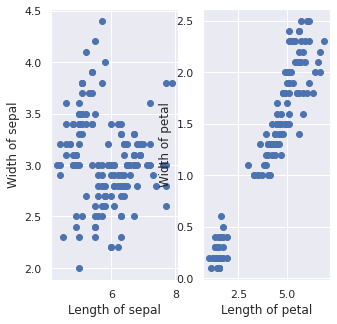

In [9]:
# plot the data
fig,ax=plt.subplots(1,2)
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
ax[0].scatter(df_iris['SepalLengthCm'],df_iris['SepalWidthCm'])
# Name your axes
ax[0].set_xlabel('Length of sepal')
ax[0].set_ylabel('Width of sepal')
ax[1].scatter(df_iris['PetalLengthCm'],df_iris['PetalWidthCm'])
ax[1].set_xlabel('Length of petal')
ax[1].set_ylabel('Width of petal')
plt.show()

In [27]:
#importing libraries for modelling
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
 # declare dependent variable
y=df_iris['Species']
x1=df_iris.drop(['Species'],axis=1)

In [13]:
#Creating a model
#K -means clustering- unsupervised ML to determine optimum nu of clusters to get the best predicted output
# Elbow method
wcss = []   #create emptty list
cul_num = 10
for i in range(1, cul_num):
  kmeans= KMeans(i)
  kmeans.fit(x1)
  wcss_iter= kmeans.inertia_
  wcss.append(wcss_iter)

wcss


[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 38.930963049671746,
 34.87946623265907,
 30.077530998389697,
 28.09474914413073]

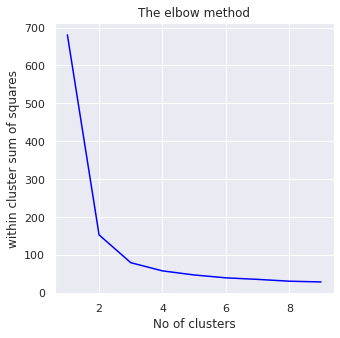

In [15]:
no_of_clus = range(1,cul_num)
plt.plot(no_of_clus, wcss, color = 'blue')
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('within cluster sum of squares')
plt.show()

The optimum number of clusters is three. There are also three species of flowers, n=3
**Creating model using K-means clustering**

In [34]:
kmeans=KMeans(3)
kmeans.fit(x1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
prediction=kmeans.predict(x1)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [19]:
cluster = x1.copy()
cluster['predicted_value']=kmeans.predict(x1)
cluster

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted_value
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,1
148,6.5,3.0,5.2,2.0,2


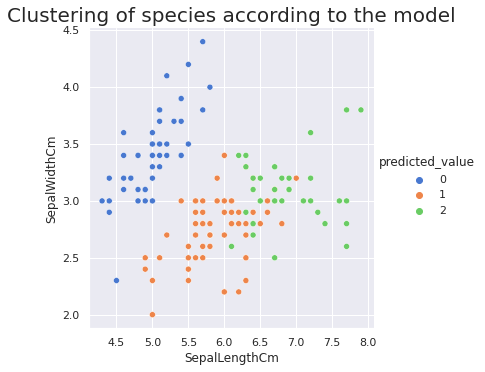

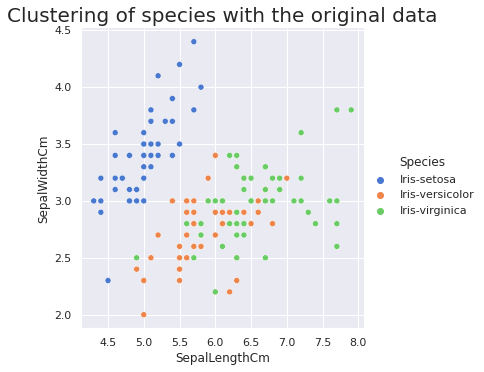

In [24]:
sns.relplot(x='SepalLengthCm',y='SepalWidthCm',hue='predicted_value',data=cluster,palette='muted')
plt.title("Clustering of species according to the model",fontsize=20)
sns.relplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df_iris,palette='muted') 
plt.title("Clustering of species with the original data",fontsize=20)
plt.show()

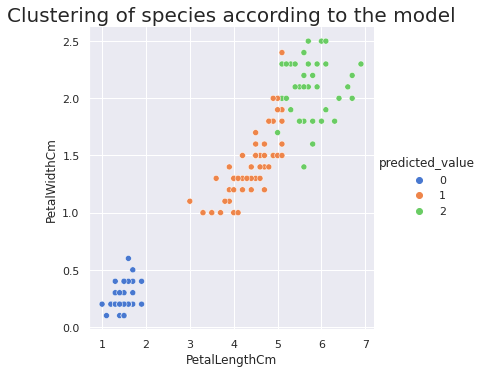

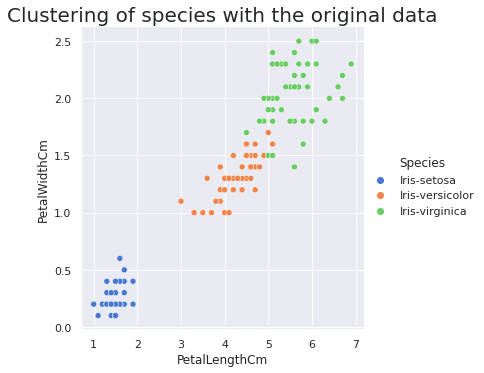

In [25]:
sns.relplot(x='PetalLengthCm',y='PetalWidthCm',hue='predicted_value',data=cluster,palette='muted')
plt.title("Clustering of species according to the model",fontsize=20)
sns.relplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df_iris,palette='muted') 
plt.title("Clustering of species with the original data",fontsize=20)
plt.show()

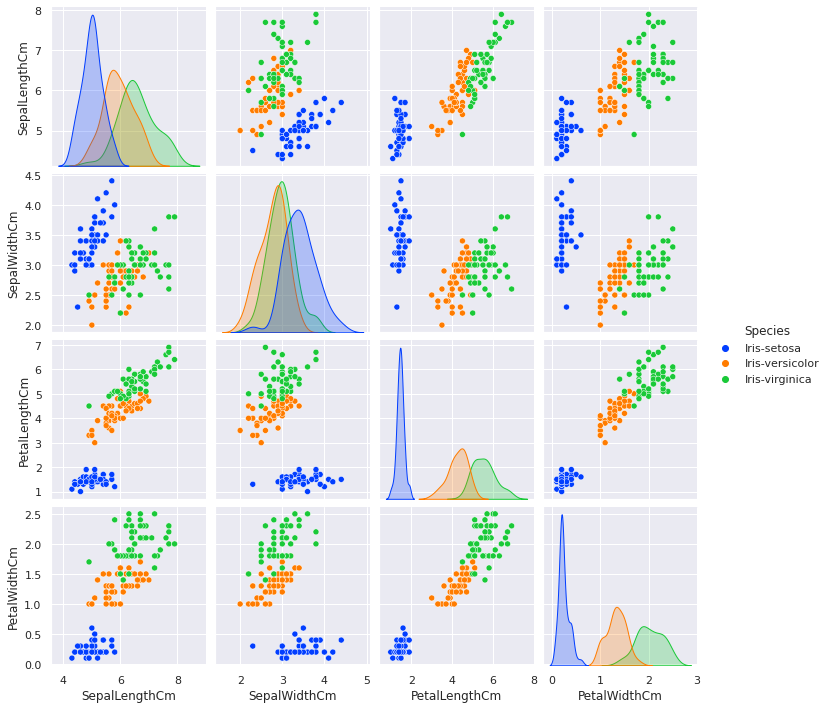

In [28]:
sns.pairplot(df_iris, hue='Species', height=2.5,palette='bright')